## Global Relational Novelty 

* The relational novelty concept is based on Kyriakou et. al. (2022). Novelty and the Structure of Design Landscapes: A Relational View of Online Innovation Communities

* However, the idea of relational novelty here is a bit different. It is considering how similar the functions are in a specific phase and treatment to the functions pooled globally. 

In [1]:
import pandas as pd
import numpy as np
import math
import collections
import matplotlib.pyplot as plt

%store -r overall_phase1
%store -r overall_phase2
%store -r overall_phase3
%store -r overall_phase4
%store -r overall_phase5


%store -r subset_bogota0_phase1
%store -r subset_bogota0_phase2
%store -r subset_bogota0_phase3
%store -r overall_phase3_bogota0
%store -r subset_bogota0_phase4
%store -r overall_phase4_bogota0
%store -r overall_phase5_bogota0
%store -r subset_bogota0_phase5
%store -r subset_bogota1_phase1
%store -r subset_bogota1_phase2
%store -r subset_bogota1_phase3
%store -r overall_phase3_bogota1
%store -r overall_phase4_bogota1
%store -r overall_phase5_bogota1
%store -r subset_bogota1_phase5
%store -r subset_bogota1_phase4
%store -r subset_bogota2_phase1
%store -r subset_bogota2_phase2
%store -r subset_bogota2_phase3
%store -r overall_phase3_bogota2
%store -r overall_phase4_bogota2
%store -r overall_phase5_bogota2
%store -r subset_bogota2_phase5
%store -r subset_bogota3_phase1
%store -r overall_phase1_bogota3
%store -r overall_phase2_bogota3
%store -r subset_bogota3_phase3
%store -r overall_phase3_bogota3
%store -r overall_phase4_bogota3
%store -r overall_phase5_bogota3
%store -r subset_bogota2_phase4

%store -r overall_phase2_bogota0
%store -r overall_phase2_bogota1
%store -r overall_phase2_bogota2
%store -r overall_phase2_bogota3

%store -r overall_phase1_bogota0
%store -r overall_phase1_bogota1
%store -r overall_phase1_bogota2
%store -r overall_phase1_bogota3

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
## List the 20,000 least common functions in a counter

overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
overall_23 = overall_12.append(overall_phase3, ignore_index=True)
overall_34 = overall_23.append(overall_phase4, ignore_index=True)
overall_45 = overall_34.append(overall_phase5, ignore_index=True)
new_list = overall_45['functions'].explode().to_list()
new_list = list(filter(None, new_list))
new_list

['.ready',
 'k.click',
 '.mcheck',
 '.on',
 '.closest',
 'p.list',
 'g.find',
 'r.form',
 '.toggleClass',
 '.val',
 'z.document.getElementById',
 'google.maps.Map',
 '.getJSON',
 'test.json',
 'bootstrap.min.css',
 'theme.min.css',
 'jquery.min.js',
 'bootstrap.min.css',
 'js.js',
 'jsondata.js',
 'cs.css',
 'style.css',
 'maps.js',
 'z.document.getElementById',
 'google.maps.Map',
 'google.maps.Marker',
 nan,
 nan,
 nan,
 'bootstrap.min.css',
 'style.css',
 '.JS',
 '.js',
 nan,
 nan,
 'jquery.min.js',
 '.js',
 'Rent.js',
 'Crimes.js',
 'google.maps.Map',
 'z.document.getElementById',
 '.ajax',
 'data.cityofchicago.org',
 'i.json',
 'Z.done',
 'dataB.length',
 'google.maps.Marker',
 'google.maps.LatLng',
 'B.latitude',
 '.longitude',
 '.primary',
 'crimeMarkers.push',
 'crimeMarker.length',
 '.setMap',
 'google.maps.InfoWindow',
 'google.maps.event.addListenerOnce',
 'infWindow.close',
 'infowindow.setContent',
 'data.primary',
 'infowindowP.open',
 'markerP.get',
 'km.innerHTML',
 'da

In [4]:
str1_nan = [x for x in new_list if str(x) != 'nan']
str1 = set(str1_nan)
str1 = list(str1)
len(str1)

162470

In [5]:
global_functions = {'Student': 'all', 'functions': [str1_nan], 'unique': [str1], 'len_unique': len(str1), 'phase': 0}
global_functions = pd.DataFrame(data=global_functions)
global_functions

,Student,functions,unique,len_unique,phase
0,all,"[.ready, k.click, .mcheck, .on, .closest, p.li...","[filtered.reduce, Mocha.utils.forEach, lu.U, j...",162470,0


## Append Global Functions with Bogota 0 Phase 5

In [6]:
subset_bogota0_phase5_all = overall_phase5_bogota0.append(global_functions, ignore_index=True)
subset_bogota0_phase5_all = subset_bogota0_phase5_all[subset_bogota0_phase5_all['len_unique'] != 0]

In [7]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase5_all["unique"], subset_bogota0_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase5_compare_all = pd.DataFrame(result)
subset_bogota0_phase5_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.017886
1,fffeelipe,jmcuestasb,0.006799
2,fffeelipe,katherinsb,0.010788
3,fffeelipe,jjrodriguezn,0.036232
4,fffeelipe,DglyP,0.015021
...,...,...,...
430,lfvalderrama,gabi04,0.119048
431,lfvalderrama,all,0.000382
432,bsgarciac,gabi04,0.118919
433,bsgarciac,all,0.000788


In [8]:
subset_bogota0_phase5_all_only = subset_bogota0_phase5_compare_all.loc[subset_bogota0_phase5_compare_all['user2'] == 'all']
subset_bogota0_phase5_all_only

,user1,user2,similarity
28,fffeelipe,all,0.000689
56,mnguzmanc,all,0.010870
83,jmcuestasb,all,0.039417
109,katherinsb,all,0.012575
134,jjrodriguezn,all,0.000191
158,DglyP,all,0.010956
181,Judgarciani,all,0.001225
203,sacastroc,all,0.000480
224,pcberriop,all,0.000548
244,hsmartineza,all,0.000400


## Append Global Functions with Bogota 0 Phase 4

In [9]:
subset_bogota0_phase4_all = overall_phase4_bogota0.append(global_functions, ignore_index=True)
subset_bogota0_phase4_all = subset_bogota0_phase4_all[subset_bogota0_phase4_all['len_unique'] != 0]

In [10]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase4_all["unique"], subset_bogota0_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase4_compare_all = pd.DataFrame(result)
subset_bogota0_phase4_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.016931
1,fffeelipe,jmcuestasb,0.006342
2,fffeelipe,katherinsb,0.025000
3,fffeelipe,jjrodriguezn,0.040000
4,fffeelipe,DglyP,0.012942
...,...,...,...
430,lfvalderrama,gabi04,0.111111
431,lfvalderrama,all,0.000382
432,bsgarciac,gabi04,0.101190
433,bsgarciac,all,0.000782


In [11]:
subset_bogota0_phase4_all_only = subset_bogota0_phase4_compare_all.loc[subset_bogota0_phase4_compare_all['user2'] == 'all']
subset_bogota0_phase4_all_only

,user1,user2,similarity
28,fffeelipe,all,0.000628
56,mnguzmanc,all,0.010833
83,jmcuestasb,all,0.039417
109,katherinsb,all,0.000129
134,jjrodriguezn,all,0.000172
158,DglyP,all,0.013824
181,Judgarciani,all,0.000800
203,sacastroc,all,0.000480
224,pcberriop,all,0.000400
244,hsmartineza,all,0.000382


## Append Global Functions with Bogota 0 Phase 3

In [12]:
subset_bogota0_phase3_all = overall_phase3_bogota0.append(global_functions, ignore_index=True)
subset_bogota0_phase3_all = subset_bogota0_phase3_all[subset_bogota0_phase3_all['len_unique'] != 0]

In [13]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase3_all["unique"], subset_bogota0_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase3_compare_all = pd.DataFrame(result)
subset_bogota0_phase3_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.005108
1,fffeelipe,jmcuestasb,0.002337
2,fffeelipe,jjrodriguezn,0.098039
3,fffeelipe,DglyP,0.238095
4,fffeelipe,Judgarciani,0.054422
...,...,...,...
401,lfvalderrama,gabi04,0.103774
402,lfvalderrama,all,0.000363
403,bsgarciac,gabi04,0.106383
404,bsgarciac,all,0.000603


In [14]:
subset_bogota0_phase3_all_only = subset_bogota0_phase3_compare_all.loc[subset_bogota0_phase3_compare_all['user2'] == 'all']
subset_bogota0_phase3_all_only

,user1,user2,similarity
27,fffeelipe,all,0.000178
54,mnguzmanc,all,0.010722
80,jmcuestasb,all,0.039417
105,jjrodriguezn,all,0.000166
129,DglyP,all,0.000142
152,Judgarciani,all,0.000776
174,sacastroc,all,0.000419
195,pcberriop,all,0.000252
215,hsmartineza,all,0.000320
234,Moimolcp,all,0.000449


## Append Global Functions with Bogota 0 Phase 2

In [15]:
subset_bogota0_phase2_all = overall_phase2_bogota0.append(global_functions, ignore_index=True)
subset_bogota0_phase2_all = subset_bogota0_phase2_all[subset_bogota0_phase2_all['len_unique'] != 0]

In [16]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase2_all["unique"], subset_bogota0_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase2_compare_all = pd.DataFrame(result)
subset_bogota0_phase2_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.102041
1,fffeelipe,jmcuestasb,0.002337
2,fffeelipe,jjrodriguezn,0.200000
3,fffeelipe,DglyP,0.238095
4,fffeelipe,Judgarciani,0.070000
...,...,...,...
401,lfvalderrama,gabi04,0.125000
402,lfvalderrama,all,0.000246
403,bsgarciac,gabi04,0.136364
404,bsgarciac,all,0.000363


In [17]:
subset_bogota0_phase2_all_only = subset_bogota0_phase2_compare_all.loc[subset_bogota0_phase2_compare_all['user2'] == 'all']
subset_bogota0_phase2_all_only

,user1,user2,similarity
27,fffeelipe,all,0.000178
54,mnguzmanc,all,0.000154
80,jmcuestasb,all,0.039417
105,jjrodriguezn,all,0.000117
129,DglyP,all,0.000142
152,Judgarciani,all,0.000480
174,sacastroc,all,0.000246
195,pcberriop,all,0.000252
215,hsmartineza,all,0.000215
234,Moimolcp,all,0.000240


## Append Global Functions with Bogota 0 Phase 1

In [18]:
subset_bogota0_phase1_all = overall_phase1_bogota0.append(global_functions, ignore_index=True)
subset_bogota0_phase1_all = subset_bogota0_phase1_all[subset_bogota0_phase1_all['len_unique'] != 0]

In [19]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase1_all["unique"], subset_bogota0_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase1_compare_all = pd.DataFrame(result)
subset_bogota0_phase1_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.086957
1,fffeelipe,DglyP,0.043478
2,fffeelipe,Judgarciani,0.052632
3,fffeelipe,sacastroc,0.130435
4,fffeelipe,pcberriop,0.071429
...,...,...,...
295,janoguerab,bsgarciac,0.078947
296,janoguerab,all,0.000018
297,lfvalderrama,bsgarciac,0.080645
298,lfvalderrama,all,0.000178


In [20]:
subset_bogota0_phase1_all_only = subset_bogota0_phase1_compare_all.loc[subset_bogota0_phase1_compare_all['user2'] == 'all']
subset_bogota0_phase1_all_only

,user1,user2,similarity
23,fffeelipe,all,0.000123
46,mnguzmanc,all,0.000031
68,DglyP,all,0.000025
89,Judgarciani,all,0.000246
109,sacastroc,all,0.000037
128,pcberriop,all,0.000246
146,hsmartineza,all,0.000142
163,Moimolcp,all,0.000240
179,JoseMolano,all,0.000018
194,maikellPardoA,all,0.000025


## Append Global Functions with Bogota 1 Phase 5

In [21]:
subset_bogota1_phase5_all = overall_phase5_bogota1.append(global_functions, ignore_index=True)
subset_bogota1_phase5_all = subset_bogota1_phase5_all[subset_bogota1_phase5_all['len_unique'] != 0]

In [22]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase5_all["unique"], subset_bogota1_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase5_compare_all = pd.DataFrame(result)
subset_bogota1_phase5_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.050000
1,gasierram,bdcajicam,0.523810
2,gasierram,dfhincapiem,0.066667
3,gasierram,helmeraac,0.119048
4,gasierram,dasalgadob,0.114754
...,...,...,...
625,jcrubioa,JairVillalba,0.091160
626,jcrubioa,all,0.002062
627,joahernandezca,JairVillalba,0.139241
628,joahernandezca,all,0.000739


In [23]:
subset_bogota1_phase5_all_only = subset_bogota1_phase5_compare_all.loc[subset_bogota1_phase5_compare_all['user2'] == 'all']
subset_bogota1_phase5_all_only

,user1,user2,similarity
34,gasierram,all,0.000369
68,adamantwharf,all,0.000018
101,bdcajicam,all,0.000222
133,dfhincapiem,all,0.000025
164,helmeraac,all,0.000209
194,dasalgadob,all,0.000049
223,falperezgo,all,0.011479
251,djguzmanc,all,0.000394
278,gsuarezc04,all,0.000252
304,oeroaq,all,0.012932


## Append Global Functions with Bogota 1 Phase 4

In [24]:
subset_bogota1_phase4_all = overall_phase4_bogota1.append(global_functions, ignore_index=True)
subset_bogota1_phase4_all = subset_bogota1_phase4_all[subset_bogota1_phase4_all['len_unique'] != 0]

In [25]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase4_all["unique"], subset_bogota1_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase4_compare_all = pd.DataFrame(result)
subset_bogota1_phase4_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.050000
1,gasierram,bdcajicam,0.523810
2,gasierram,dfhincapiem,0.066667
3,gasierram,helmeraac,0.119048
4,gasierram,dasalgadob,0.114754
...,...,...,...
661,jcrubioa,JairVillalba,0.078488
662,jcrubioa,all,0.002062
663,joahernandezca,JairVillalba,0.130435
664,joahernandezca,all,0.000739


In [26]:
subset_bogota1_phase4_all_only = subset_bogota1_phase4_compare_all.loc[subset_bogota1_phase4_compare_all['user2'] == 'all']
subset_bogota1_phase4_all_only

,user1,user2,similarity
35,gasierram,all,0.000369
70,adamantwharf,all,0.000018
104,bdcajicam,all,0.000222
137,dfhincapiem,all,0.000025
169,helmeraac,all,0.000209
200,dasalgadob,all,0.000049
230,falperezgo,all,0.011442
259,djguzmanc,all,0.000394
287,gsuarezc04,all,0.000252
314,oeroaq,all,0.015461


## Append Global Functions with Bogota 1 Phase 3

In [27]:
subset_bogota1_phase3_all = overall_phase3_bogota1.append(global_functions, ignore_index=True)
subset_bogota1_phase3_all = subset_bogota1_phase3_all[subset_bogota1_phase3_all['len_unique'] != 0]

In [28]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase3_all["unique"], subset_bogota1_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase3_compare_all = pd.DataFrame(result)
subset_bogota1_phase3_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.050000
1,gasierram,bdcajicam,0.523810
2,gasierram,dfhincapiem,0.066667
3,gasierram,helmeraac,0.102941
4,gasierram,dasalgadob,0.114754
...,...,...,...
661,jcrubioa,JairVillalba,0.072886
662,jcrubioa,all,0.002062
663,joahernandezca,JairVillalba,0.126866
664,joahernandezca,all,0.000726


In [29]:
subset_bogota1_phase3_all_only = subset_bogota1_phase3_compare_all.loc[subset_bogota1_phase3_compare_all['user2'] == 'all']
subset_bogota1_phase3_all_only

,user1,user2,similarity
35,gasierram,all,0.000369
70,adamantwharf,all,0.000018
104,bdcajicam,all,0.000222
137,dfhincapiem,all,0.000025
169,helmeraac,all,0.000092
200,dasalgadob,all,0.000049
230,falperezgo,all,0.011073
259,djguzmanc,all,0.000302
287,gsuarezc04,all,0.000252
314,oeroaq,all,0.004136


## Append Global Functions with Bogota 1 Phase 2

In [30]:
subset_bogota1_phase2_all = overall_phase2_bogota1.append(global_functions, ignore_index=True)
subset_bogota1_phase2_all = subset_bogota1_phase2_all[subset_bogota1_phase2_all['len_unique'] != 0]

In [31]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase2_all["unique"], subset_bogota1_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase2_compare_all = pd.DataFrame(result)
subset_bogota1_phase2_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.187500
1,gasierram,bdcajicam,0.187500
2,gasierram,dfhincapiem,0.250000
3,gasierram,helmeraac,0.192308
4,gasierram,dasalgadob,0.411765
...,...,...,...
661,jcrubioa,JairVillalba,0.056047
662,jcrubioa,all,0.002062
663,joahernandezca,JairVillalba,0.128000
664,joahernandezca,all,0.000726


In [32]:
subset_bogota1_phase2_all_only = subset_bogota1_phase2_compare_all.loc[subset_bogota1_phase2_compare_all['user2'] == 'all']
subset_bogota1_phase2_all_only

,user1,user2,similarity
35,gasierram,all,0.000098
70,adamantwharf,all,0.000018
104,bdcajicam,all,0.000018
137,dfhincapiem,all,0.000025
169,helmeraac,all,0.000092
200,dasalgadob,all,0.000049
230,falperezgo,all,0.011073
259,djguzmanc,all,0.000271
287,gsuarezc04,all,0.000252
314,oeroaq,all,0.000868


## Append Global Functions with Bogota 1 Phase 1

In [33]:
subset_bogota1_phase1_all = overall_phase1_bogota1.append(global_functions, ignore_index=True)
subset_bogota1_phase1_all = subset_bogota1_phase1_all[subset_bogota1_phase1_all['len_unique'] != 0]

In [34]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase1_all["unique"], subset_bogota1_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase1_compare_all = pd.DataFrame(result)
subset_bogota1_phase1_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.187500
1,gasierram,bdcajicam,0.187500
2,gasierram,helmeraac,0.222222
3,gasierram,dasalgadob,0.411765
4,gasierram,falperezgo,0.161290
...,...,...,...
523,jcrubioa,JairVillalba,0.009174
524,jcrubioa,all,0.002007
525,joahernandezca,JairVillalba,0.750000
526,joahernandezca,all,0.000018


In [35]:
subset_bogota1_phase1_all_only = subset_bogota1_phase1_compare_all.loc[subset_bogota1_phase1_compare_all['user2'] == 'all']
subset_bogota1_phase1_all_only

,user1,user2,similarity
31,gasierram,all,0.000098
62,adamantwharf,all,0.000018
92,bdcajicam,all,0.000018
121,helmeraac,all,0.000037
149,dasalgadob,all,0.000049
176,falperezgo,all,0.000123
202,djguzmanc,all,0.000203
227,oeroaq,all,0.000671
251,gcantem,all,0.000671
274,Semoralesga,all,0.000031


## Append Global Functions with Bogota 2 Phase 5

In [36]:
subset_bogota2_phase5_all = overall_phase5_bogota2.append(global_functions, ignore_index=True)
subset_bogota2_phase5_all = subset_bogota2_phase5_all[subset_bogota2_phase5_all['len_unique'] != 0]

In [37]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase5_all["unique"], subset_bogota2_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase5_compare_all = pd.DataFrame(result)
subset_bogota2_phase5_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.003471
1,jusherrerama,Phoenixest,0.001489
2,jusherrerama,HashNick,0.006799
3,jusherrerama,ccvacad,0.005268
4,jusherrerama,joaortizro,0.002962
...,...,...,...
736,lsfinite,jscontrerasp,0.003074
737,lsfinite,all,0.027950
738,xdanielsb,jscontrerasp,0.021882
739,xdanielsb,all,0.002708


In [38]:
subset_bogota2_phase5_all_only = subset_bogota2_phase5_compare_all.loc[subset_bogota2_phase5_compare_all['user2'] == 'all']
subset_bogota2_phase5_all_only

,user1,user2,similarity
37,jusherrerama,all,0.012396
74,bdvegat,all,0.000062
110,Phoenixest,all,0.000025
145,HashNick,all,0.000363
179,ccvacad,all,0.000523
212,joaortizro,all,0.000111
244,juasmartinezbel,all,0.001194
275,mdbelloc,all,0.000326
305,diegocruz10,all,0.000240
334,sagilm,all,0.000222


## Append Global Functions with Bogota 2 Phase 4

In [39]:
subset_bogota2_phase4_all = overall_phase4_bogota2.append(global_functions, ignore_index=True)
subset_bogota2_phase4_all = subset_bogota2_phase4_all[subset_bogota2_phase4_all['len_unique'] != 0]

In [40]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase4_all["unique"], subset_bogota2_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase4_compare_all = pd.DataFrame(result)
subset_bogota2_phase4_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.003471
1,jusherrerama,Phoenixest,0.001489
2,jusherrerama,HashNick,0.006799
3,jusherrerama,ccvacad,0.004819
4,jusherrerama,joaortizro,0.002962
...,...,...,...
736,lsfinite,jscontrerasp,0.003074
737,lsfinite,all,0.027950
738,xdanielsb,jscontrerasp,0.028689
739,xdanielsb,all,0.001379


In [41]:
subset_bogota2_phase4_all_only = subset_bogota2_phase4_compare_all.loc[subset_bogota2_phase5_compare_all['user2'] == 'all']
subset_bogota2_phase4_all_only

,user1,user2,similarity
37,jusherrerama,all,0.012396
74,bdvegat,all,0.000062
110,Phoenixest,all,0.000025
145,HashNick,all,0.000363
179,ccvacad,all,0.000437
212,joaortizro,all,0.000111
244,juasmartinezbel,all,0.001194
275,mdbelloc,all,0.000326
305,diegocruz10,all,0.000240
334,sagilm,all,0.000129


## Append Global Functions with Bogota 2 Phase 3

In [42]:
subset_bogota2_phase3_all = overall_phase3_bogota2.append(global_functions, ignore_index=True)
subset_bogota2_phase3_all = subset_bogota2_phase3_all[subset_bogota2_phase3_all['len_unique'] != 0]

In [43]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase3_all["unique"], subset_bogota2_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase3_compare_all = pd.DataFrame(result)
subset_bogota2_phase3_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.003471
1,jusherrerama,Phoenixest,0.001489
2,jusherrerama,HashNick,0.005350
3,jusherrerama,joaortizro,0.002962
4,jusherrerama,juasmartinezbel,0.005615
...,...,...,...
698,lsfinite,jscontrerasp,0.003516
699,lsfinite,all,0.027937
700,xdanielsb,jscontrerasp,0.033654
701,xdanielsb,all,0.001157


In [44]:
subset_bogota2_phase3_all_only = subset_bogota2_phase3_compare_all.loc[subset_bogota2_phase3_compare_all['user2'] == 'all']
subset_bogota2_phase3_all_only

,user1,user2,similarity
36,jusherrerama,all,0.012396
72,bdvegat,all,0.000062
107,Phoenixest,all,0.000025
141,HashNick,all,0.000326
174,joaortizro,all,0.000111
206,juasmartinezbel,all,0.000831
237,mdbelloc,all,0.000326
267,diegocruz10,all,0.000240
296,sagilm,all,0.000129
324,idrojasf,all,0.003465


## Append Global Functions with Bogota 2 Phase 2

In [45]:
subset_bogota2_phase2_all = overall_phase2_bogota2.append(global_functions, ignore_index=True)
subset_bogota2_phase2_all = subset_bogota2_phase2_all[subset_bogota2_phase2_all['len_unique'] != 0]

In [46]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase2_all["unique"], subset_bogota2_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase2_compare_all = pd.DataFrame(result)
subset_bogota2_phase2_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.187500
1,jusherrerama,Phoenixest,0.187500
2,jusherrerama,HashNick,0.062500
3,jusherrerama,joaortizro,0.190476
4,jusherrerama,juasmartinezbel,0.037037
...,...,...,...
698,lsfinite,jscontrerasp,0.002207
699,lsfinite,all,0.027827
700,xdanielsb,jscontrerasp,0.030457
701,xdanielsb,all,0.001120


In [47]:
subset_bogota2_phase2_all_only = subset_bogota2_phase2_compare_all.loc[subset_bogota2_phase2_compare_all['user2'] == 'all']
subset_bogota2_phase2_all_only

,user1,user2,similarity
36,jusherrerama,all,0.000092
72,bdvegat,all,0.000025
107,Phoenixest,all,0.000025
141,HashNick,all,0.000326
174,joaortizro,all,0.000062
206,juasmartinezbel,all,0.000597
237,mdbelloc,all,0.000326
267,diegocruz10,all,0.000160
296,sagilm,all,0.000031
324,idrojasf,all,0.003465


## Append Global Functions with Bogota 2 Phase 1

In [48]:
subset_bogota2_phase1_all = overall_phase1_bogota2.append(global_functions, ignore_index=True)
subset_bogota2_phase1_all = subset_bogota2_phase1_all[subset_bogota2_phase1_all['len_unique'] != 0]

In [49]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase1_all["unique"], subset_bogota2_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase1_compare_all = pd.DataFrame(result)
subset_bogota2_phase1_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.187500
1,jusherrerama,Phoenixest,0.187500
2,jusherrerama,HashNick,0.057143
3,jusherrerama,joaortizro,0.043478
4,jusherrerama,juasmartinezbel,0.039604
...,...,...,...
661,lsfinite,jscontrerasp,0.166667
662,lsfinite,all,0.000055
663,xdanielsb,jscontrerasp,0.018182
664,xdanielsb,all,0.001003


In [50]:
subset_bogota2_phase1_all_only = subset_bogota2_phase1_compare_all.loc[subset_bogota2_phase1_compare_all['user2'] == 'all']
subset_bogota2_phase1_all_only

,user1,user2,similarity
35,jusherrerama,all,0.000092
70,bdvegat,all,0.000025
104,Phoenixest,all,0.000025
137,HashNick,all,0.000363
169,joaortizro,all,0.000055
200,juasmartinezbel,all,0.000554
230,mdbelloc,all,0.000326
259,diegocruz10,all,0.000154
287,sagilm,all,0.000018
314,idrojasf,all,0.003465


## Append Global Functions with Bogota 3 Phase 5

In [51]:
subset_bogota3_phase5_all = overall_phase5_bogota3.append(global_functions, ignore_index=True)
subset_bogota3_phase5_all = subset_bogota3_phase5_all[subset_bogota3_phase5_all['len_unique'] != 0]

In [52]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase5_all["unique"], subset_bogota3_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

overall_phase5_bogota3_compare_all = pd.DataFrame(result)
overall_phase5_bogota3_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.006071
1,lemartinp,nfmorenog,0.151515
2,lemartinp,AFelipeGA,0.007299
3,lemartinp,mballeng91,0.000213
4,lemartinp,dduartec,0.007151
...,...,...,...
736,lizzyt10h,jumcorredorro,0.072727
737,lizzyt10h,all,0.000437
738,NicolasPrr,jumcorredorro,0.109848
739,NicolasPrr,all,0.000788


In [53]:
subset_bogota3_phase5_all_only = overall_phase5_bogota3_compare_all.loc[overall_phase5_bogota3_compare_all['user2'] == 'all']
subset_bogota3_phase5_all_only

,user1,user2,similarity
37,lemartinp,all,0.000154
74,juligarji,all,0.014126
110,nfmorenog,all,0.000314
145,AFelipeGA,all,0.011738
179,mballeng91,all,0.374974
212,dduartec,all,0.011116
244,srmedinac,all,0.000339
275,wilson911013,all,0.002130
305,wapiravaguens,all,0.000474
334,davidh17,all,0.000535


## Append Global Functions with Bogota 3 Phase 4

In [54]:
subset_bogota3_phase4_all = overall_phase4_bogota3.append(global_functions, ignore_index=True)
subset_bogota3_phase4_all = subset_bogota3_phase4_all[subset_bogota3_phase4_all['len_unique'] != 0]

In [55]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase4_all["unique"], subset_bogota3_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

overall_phase4_bogota3_compare_all = pd.DataFrame(result)
overall_phase4_bogota3_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.006074
1,lemartinp,nfmorenog,0.151515
2,lemartinp,AFelipeGA,0.007299
3,lemartinp,mballeng91,0.000213
4,lemartinp,dduartec,0.049180
...,...,...,...
698,lizzyt10h,jumcorredorro,0.070707
699,lizzyt10h,all,0.000382
700,NicolasPrr,jumcorredorro,0.054449
701,NicolasPrr,all,0.003964


In [56]:
subset_bogota3_phase4_all_only = overall_phase4_bogota3_compare_all.loc[overall_phase4_bogota3_compare_all['user2'] == 'all']
subset_bogota3_phase4_all_only

,user1,user2,similarity
36,lemartinp,all,0.000154
72,juligarji,all,0.014120
107,nfmorenog,all,0.000314
141,AFelipeGA,all,0.011738
174,mballeng91,all,0.374974
206,dduartec,all,0.000634
237,srmedinac,all,0.000339
267,wilson911013,all,0.002130
296,wapiravaguens,all,0.000443
324,davidh17,all,0.000542


## Append Global Functions with Bogota 3 Phase 3

In [57]:
subset_bogota3_phase3_all = overall_phase3_bogota3.append(global_functions, ignore_index=True)
subset_bogota3_phase3_all = subset_bogota3_phase3_all[subset_bogota3_phase3_all['len_unique'] != 0]

In [58]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase3_all["unique"], subset_bogota3_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota3_phase3_compare_all = pd.DataFrame(result)
subset_bogota3_phase3_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.002667
1,lemartinp,nfmorenog,0.140351
2,lemartinp,AFelipeGA,0.003133
3,lemartinp,mballeng91,0.000066
4,lemartinp,dduartec,0.054054
...,...,...,...
698,lizzyt10h,jumcorredorro,0.103093
699,lizzyt10h,all,0.000098
700,NicolasPrr,jumcorredorro,0.057692
701,NicolasPrr,all,0.000117


In [59]:
subset_bogota3_phase3_all_only = subset_bogota3_phase3_compare_all.loc[subset_bogota3_phase3_compare_all['user2'] == 'all']
subset_bogota3_phase3_all_only

,user1,user2,similarity
36,lemartinp,all,0.000086
72,juligarji,all,0.013799
107,nfmorenog,all,0.000314
141,AFelipeGA,all,0.011738
174,mballeng91,all,0.374949
206,dduartec,all,0.000634
237,srmedinac,all,0.000345
267,wilson911013,all,0.002111
296,wapiravaguens,all,0.000480
324,davidh17,all,0.000375


## Append Global Functions with Bogota 3 Phase 2

In [60]:
subset_bogota3_phase2_all = overall_phase2_bogota3.append(global_functions, ignore_index=True)
subset_bogota3_phase2_all = subset_bogota3_phase2_all[subset_bogota3_phase2_all['len_unique'] != 0]

In [61]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase2_all["unique"], subset_bogota3_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

overall_phase2_bogota3_compare_all = pd.DataFrame(result)
overall_phase2_bogota3_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.028777
1,lemartinp,nfmorenog,0.166667
2,lemartinp,AFelipeGA,0.003133
3,lemartinp,mballeng91,0.000066
4,lemartinp,dduartec,0.127660
...,...,...,...
698,lizzyt10h,jumcorredorro,0.186047
699,lizzyt10h,all,0.000080
700,NicolasPrr,jumcorredorro,0.096154
701,NicolasPrr,all,0.000117


In [62]:
subset_bogota3_phase2_all_only = overall_phase2_bogota3_compare_all.loc[overall_phase2_bogota3_compare_all['user2'] == 'all']
subset_bogota3_phase2_all_only

,user1,user2,similarity
36,lemartinp,all,0.000086
72,juligarji,all,0.000794
107,nfmorenog,all,0.000259
141,AFelipeGA,all,0.011738
174,mballeng91,all,0.374949
206,dduartec,all,0.000240
237,srmedinac,all,0.000345
267,wilson911013,all,0.002111
296,wapiravaguens,all,0.000363
324,davidh17,all,0.000259


## Append Global Functions with Bogota 3 Phase 1

In [63]:
subset_bogota3_phase1_all = overall_phase1_bogota3.append(global_functions, ignore_index=True)
subset_bogota3_phase1_all = subset_bogota3_phase1_all[subset_bogota3_phase1_all['len_unique'] != 0]

In [64]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase1_all["unique"], subset_bogota3_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota3_phase1_compare_all = pd.DataFrame(result)
subset_bogota3_phase1_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.045455
1,lemartinp,nfmorenog,0.157895
2,lemartinp,AFelipeGA,0.008621
3,lemartinp,mballeng91,0.000049
4,lemartinp,dduartec,0.040000
...,...,...,...
698,lizzyt10h,jumcorredorro,0.209677
699,lizzyt10h,all,0.000720
700,NicolasPrr,jumcorredorro,0.106383
701,NicolasPrr,all,0.000117


In [65]:
subset_bogota3_phase1_all_only = subset_bogota3_phase1_compare_all.loc[subset_bogota3_phase1_compare_all['user2'] == 'all']
subset_bogota3_phase1_all_only

,user1,user2,similarity
36,lemartinp,all,0.000043
72,juligarji,all,0.000098
107,nfmorenog,all,0.000092
141,AFelipeGA,all,0.000677
174,mballeng91,all,0.374906
206,dduartec,all,0.000117
237,srmedinac,all,0.000351
267,wapiravaguens,all,0.000191
296,davidh17,all,0.000092
324,DianaNavarrete,all,0.000031


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

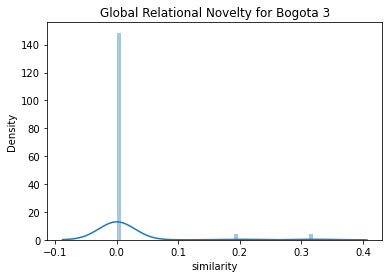

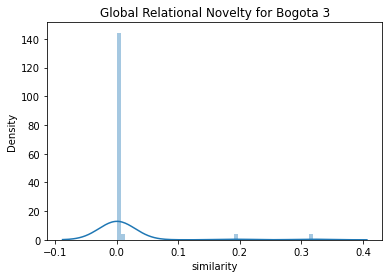

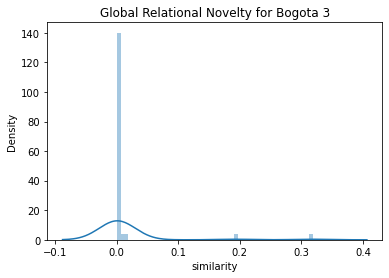

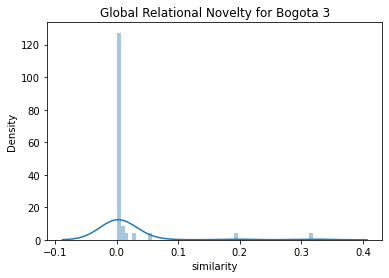

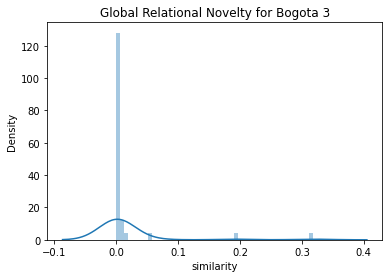

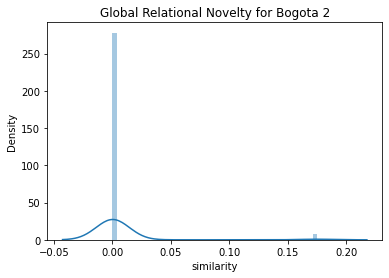

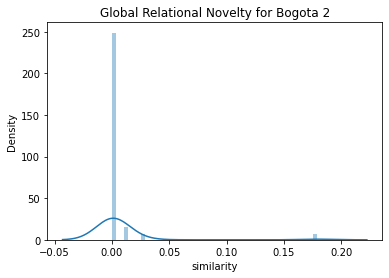

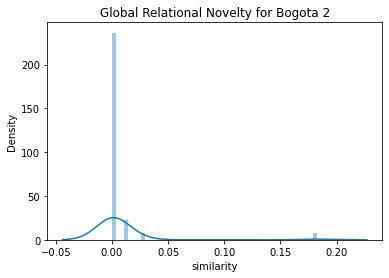

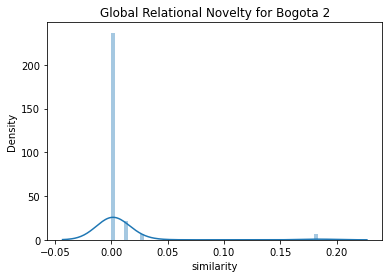

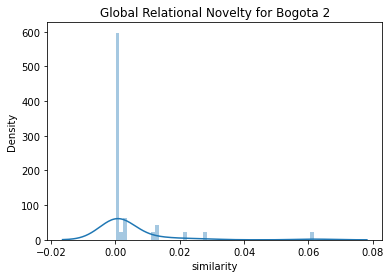

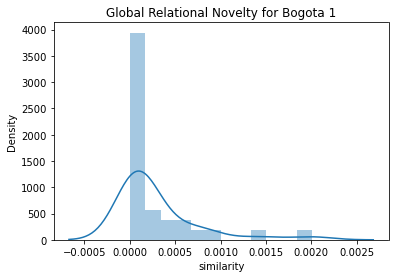

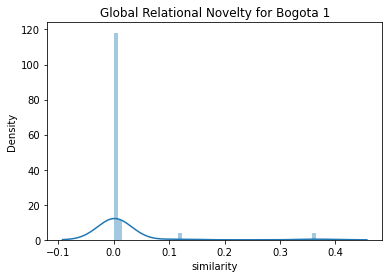

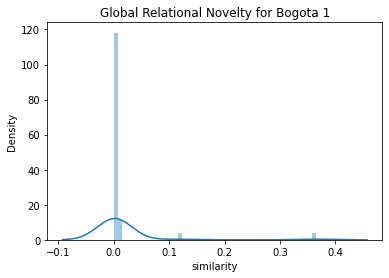

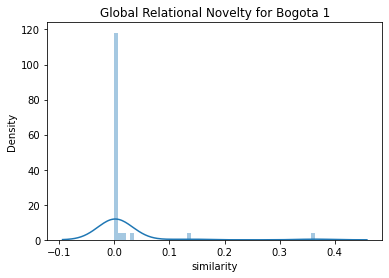

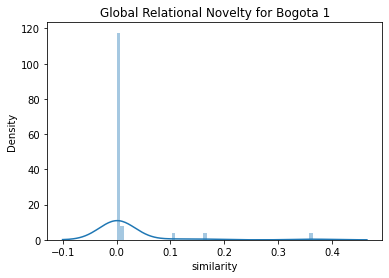

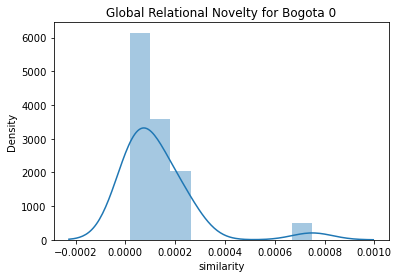

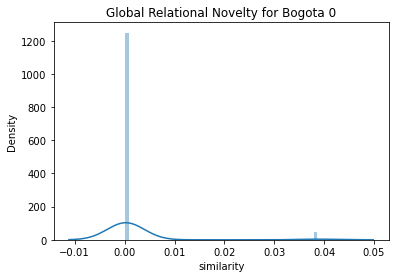

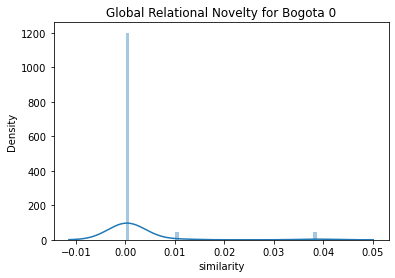

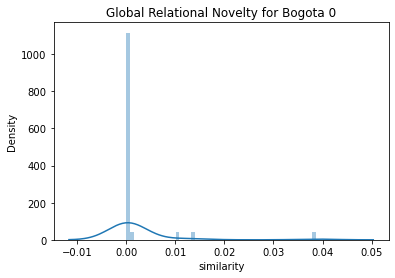

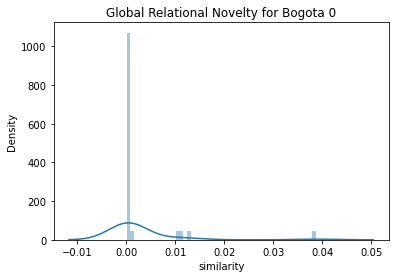

In [66]:
median_log_bogota3 = []
median_log_bogota2 = []
median_log_bogota1 = []
median_log_bogota0 = []

mean_log_bogota3 = []
mean_log_bogota2 = []
mean_log_bogota1 = []
mean_log_bogota0 = []

max_log_bogota3 = []
max_log_bogota2 = []
max_log_bogota1 = []
max_log_bogota0 = []

for df in [subset_bogota3_phase1_all_only, subset_bogota3_phase2_all_only, subset_bogota3_phase3_all_only, subset_bogota3_phase4_all_only, subset_bogota3_phase5_all_only]:
    median_value = (np.log(df['similarity']+1)).median()
    mean_value = (np.log(df['similarity']+1)).mean()
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota3.append(max_value)
    median_log_bogota3.append(median_value)
    mean_log_bogota3.append(mean_value)
    plt.figure()
    plt.title("Global Relational Novelty for Bogota 3")
    sns.distplot(np.log(df['similarity']+1))

for df in [subset_bogota2_phase1_all_only, subset_bogota2_phase2_all_only, subset_bogota2_phase3_all_only, subset_bogota2_phase4_all_only, subset_bogota2_phase5_all_only]:
    median_value = (np.log(df['similarity']+1)).median()
    mean_value = (np.log(df['similarity']+1)).mean()
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota2.append(max_value)
    median_log_bogota2.append(median_value)
    mean_log_bogota2.append(mean_value)
    plt.figure()
    plt.title("Global Relational Novelty for Bogota 2")
    sns.distplot(np.log(df['similarity']+1))
    
for df in [subset_bogota1_phase1_all_only, subset_bogota1_phase2_all_only, subset_bogota1_phase3_all_only, subset_bogota1_phase4_all_only, subset_bogota1_phase5_all_only]:
    median_value = (np.log(df['similarity']+1)).median()
    mean_value = (np.log(df['similarity']+1)).mean()
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota1.append(max_value)
    median_log_bogota1.append(median_value)
    mean_log_bogota1.append(mean_value)
    plt.figure()
    plt.title("Global Relational Novelty for Bogota 1")
    sns.distplot(np.log(df['similarity']+1))

for df in [subset_bogota0_phase1_all_only, subset_bogota0_phase2_all_only, subset_bogota0_phase3_all_only, subset_bogota0_phase4_all_only, subset_bogota0_phase5_all_only]:
    median_value = (np.log(df['similarity']+1)).median()
    mean_value = (np.log(df['similarity']+1)).mean()
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota0.append(max_value)
    median_log_bogota0.append(median_value)
    mean_log_bogota0.append(mean_value)
    plt.figure()
    plt.title("Global Relational Novelty for Bogota 0")
    sns.distplot(np.log(df['similarity']+1))

> Interpretation: The distribution is positively skewed, so we should consider the median 

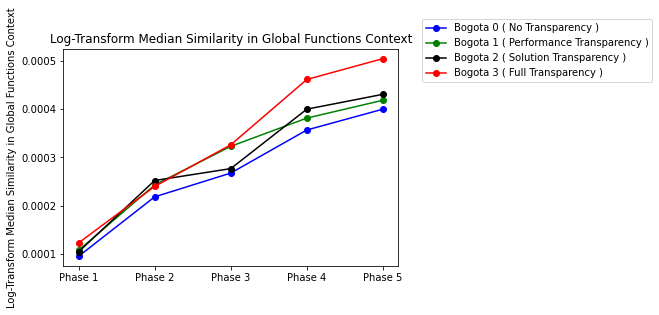

In [67]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = median_log_bogota0
y2 = median_log_bogota1
y3 = median_log_bogota2
y4 = median_log_bogota3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Log-Transform Median Similarity in Global Functions Context")
plt.ylabel("Log-Transform Median Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

> Interpretations: A lot of the functions from the global pool comes from phase 4 and phase 5 of the full transparency case. 

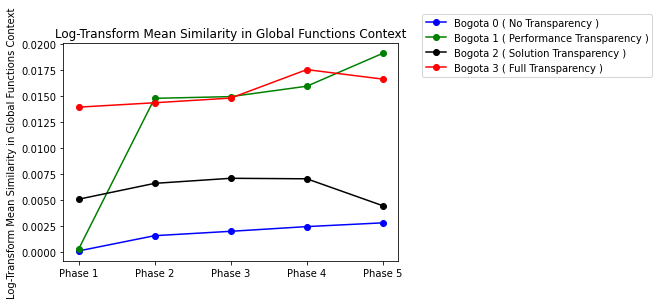

In [68]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = mean_log_bogota0
y2 = mean_log_bogota1
y3 = mean_log_bogota2
y4 = mean_log_bogota3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Log-Transform Mean Similarity in Global Functions Context")
plt.ylabel("Log-Transform Mean Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

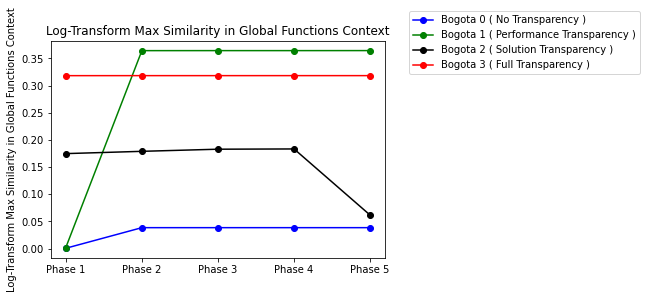

In [69]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = max_log_bogota0
y2 = max_log_bogota1
y3 = max_log_bogota2
y4 = max_log_bogota3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Log-Transform Max Similarity in Global Functions Context")
plt.ylabel("Log-Transform Max Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [70]:
%store overall_phase1
%store overall_phase2
%store overall_phase3
%store overall_phase4
%store overall_phase5
%store df_all
%store subset_bogota0_phase1
%store subset_bogota0_phase2
%store subset_bogota0_phase3
%store subset_bogota0_phase4
%store subset_bogota0_phase5
%store subset_bogota1_phase1
%store subset_bogota1_phase2
%store subset_bogota1_phase3
%store subset_bogota1_phase4
%store subset_bogota1_phase5
%store subset_bogota2_phase1
%store subset_bogota2_phase2
%store subset_bogota2_phase3
%store subset_bogota2_phase4
%store subset_bogota2_phase5
%store subset_bogota3_phase1
%store overall_phase2_bogota3
%store overall_phase3_bogota3
%store overall_phase4_bogota3
%store overall_phase5_bogota3

Stored 'overall_phase1' (DataFrame)
Stored 'overall_phase2' (DataFrame)
Stored 'overall_phase3' (DataFrame)
Stored 'overall_phase4' (DataFrame)
Stored 'overall_phase5' (DataFrame)


UsageError: Unknown variable 'df_all'


In [ ]:
%store str1